## Парная линейная регрессия

#### Цель работы

Познакомиться с основными понятиями задачи регрессии и метода градиентного спуска.

#### Содержание работы

1. Загрузить данные из тектовых файлов.
2. Создать и построить модель парной линейной регрессии с использованием метода градиентного спуска.
3. Оценить на графике качество построенной модели.
4. Построить кривые обучения.

#### Методические указания

Для полноценной работы с регрессионным анализом данных на потребуются следующие библиотеки языка Python:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
x = pd.read_csv('data/x.csv')
y = pd.read_csv('data/y.csv')
x.head()

,Unnamed: 0,0
0,0,1.462108
1,1,1.133769
2,2,-2.301539
3,3,1.744812
4,4,0.042214


In [3]:
x = pd.read_csv('data/x.csv', index_col=0)['0']
y = pd.read_csv('data/y.csv', index_col=0)['0']
x.head()

0    1.462108
1    1.133769
2   -2.301539
3    1.744812
4    0.042214
Name: 0, dtype: float64

График совместного распределения значений используемых переменных:

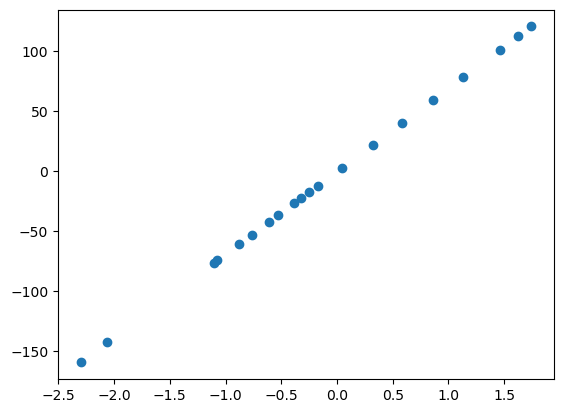

In [4]:
plt.figure()
plt.scatter(x, y)
plt.show()

Мы видим, что линейная зависимость прослеживается в данных. Значит, мы можем продолжать и использовать парную линейную регрессию.

Начнем строить класс, который будет реализовывать метод парной линейной регрессии:

predict - метод предсказания результата по факторам;

error - функция ошибки - среднеквадратическое отклонение (mean squared error, MSE);

fit - метод градиентного спуска.

In [5]:
class Model(object):
    def __init__(self):
        self.b0 = 0
        self.b1 = 0
    def predict(self, x):
        return self.b0 + self.b1 * x
    def error(self, X, Y):    
        return sum((self.predict(X) - Y)**2) / (2 * len(X)) 
    def fit(self, X, Y):  
        alpha = 0.1
        dJ0 = sum(self.predict(X) - Y) /len(X)
        dJ1 = sum((self.predict(X) - Y) * X) /len(X)
        self.b0 -= alpha * dJ0
        self.b1 -= alpha * dJ1

Создадим объект регрессии и проверим начальное значение ошибки:

In [6]:
hyp = Model()
print(hyp.predict(0))
print(hyp.predict(100))
J = hyp.error(x, y)
print("initial error:", J)

0
0
initial error: 2937.6446095153406


График регрессии:

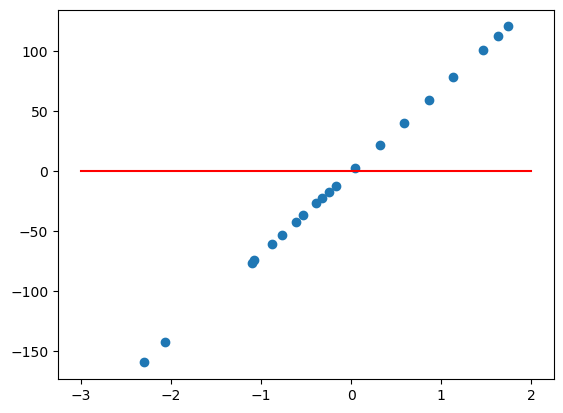

In [7]:
X0 = np.linspace(-3, 2, 100)
Y0 = hyp.predict(X0)
plt.figure()
plt.scatter(x, y)
plt.plot(X0, Y0, 'r')
plt.show()

Запуск градиентного спуска:

In [8]:
hyp.fit(x, y)
J = hyp.error(x, y)
print("error after gradient descent:", J)

error after gradient descent: 2253.7456808918546


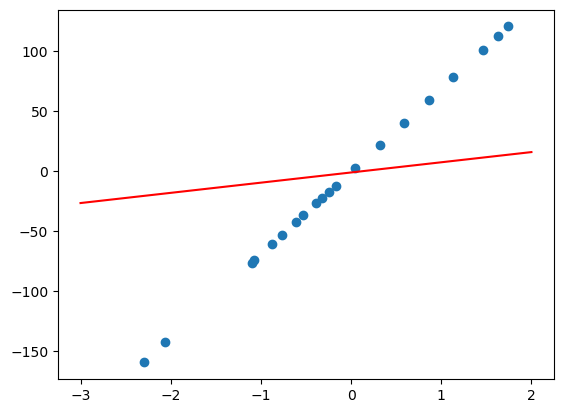

In [9]:
X0 = np.linspace(-3, 2, 100)
Y0 = hyp.predict(X0)
plt.figure()
plt.scatter(x, y)
plt.plot(X0, Y0, 'r')
plt.show()

Как мы видим, численное значение ошибки значительно уменьшилось. Да и линия на графике существенно приблизилось к точкам. Конечно, наша модель еще далека от совершенства. Мы прошли всего лишь одну итерацию градиентного спуска. Модифицируем метод так, чтобы он запускался в цикле определенное количество раз:

In [10]:
class Model(object):
    def __init__(self):
        self.b0 = 0
        self.b1 = 0
    def predict(self, X):
        return self.b0 + self.b1 * X
    def error(self, X, Y):
        return sum(((self.predict(X) - Y)**2) / (2 * len(X)))
    def fit(self, X, Y, alpha=0.001, accuracy=0.01, max_steps=5000):
        steps, errors = [], []
        step = 0        
        for _ in range(10000):
            dJ0 = sum(self.predict(X) - Y) /len(X)
            dJ1 = sum((self.predict(X) - Y) * X) /len(X)
            self.b0 -= alpha * dJ0
            self.b1 -= alpha * dJ1    
            new_err = hyp.error(X, Y)
            step += 1            
            steps.append(step)
            errors.append(new_err)
        return steps, errors

In [11]:
hyp = Model()
steps, errors = hyp.fit(x, y)
J = hyp.error(x, y)
print("error after gradient descent:", J)

error after gradient descent: 2.776975306057215e-06


Регрессия новой модели:

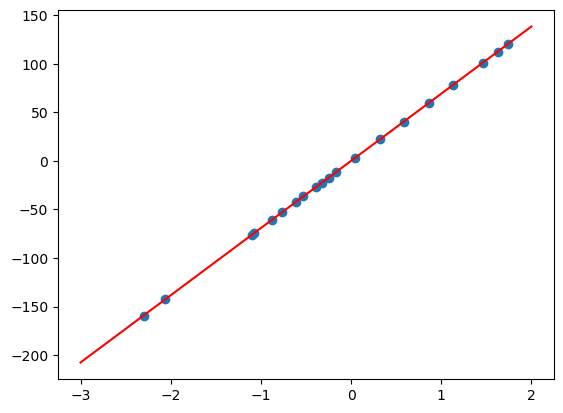

In [12]:
X0 = np.linspace(-3, 2, 100)
Y0 = hyp.predict(X0)
plt.figure()
plt.scatter(x, y)
plt.plot(X0, Y0, 'r')
plt.show()

Уже значительно лучше. Линия регрессии довольно похожа на оптимальную. Так ли это на самом деле, глядя на график, сказать сложно, для этого нужно проанализировать, как ошибка регрессии менялась со временем:

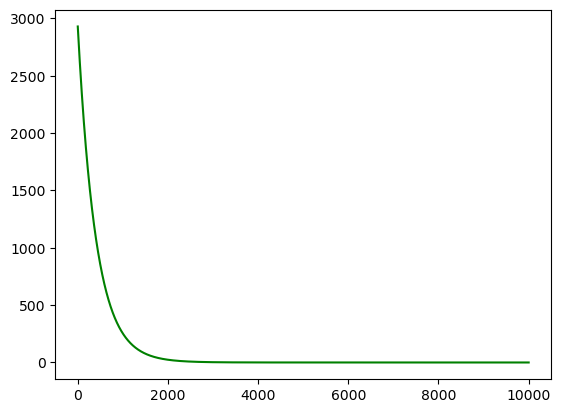

In [13]:
plt.figure()
plt.plot(steps, errors, 'g')
plt.show()

На графике наглядно видно, что в начале обучения ошибка падала быстро, но в ходе градиентного спуска она вышла на плато. Учитывая, что мы используем гладкую функцию ошибки второго порядка, это свидетельствует о том, что мы достигли локального оптимума и дальнейшее повторение алгоритма не принесет улучшения модели.

#### Задания для самостоятельного выполнения

1. Проверьте работу модели с разными начальными значениями параметров. Убедитесь, что модель всегда сходится к оптимуму. 
1. Проверьте работу модели с другими значениями скорости обучения. Найдите значение, при котором градиентный спуск расходится. 
1. Модифицируйте код модели таким образом, чтобы он корректно работал как с _Series_, так и с _DataFrame_. При этом, конечно, датафрейм не должен содержать "лишних" столбцов.
1. Модифицируйте алгоритм градиентного спука таким образом, чтобы он останавливаля, если ошибка перестает снижаться. Для этого сравнивайте, на сколько понизилась ошибка на каждом шаге и если это снижение меньше некоторой заранее заданной очень маленькой величины - выходите из цикла. Эту величину можно взять одну миллионную, например. 
1. Убедитесь, что алгоритм градиентного спуска завершается всегда - либо если ошибка перестает существенно меняться, либо при достижении максимального количества шагов. 
1. Реализуйте механизм адаптивной скорости обучения. Чтобы не задавать вручную параметр _alpha_ можно отслеживать, увеличивается ли ошибка после первого шага градиентного спуска. В начале задаем скорость обучения близкой к 1. Если ошибка после одного шага увеличивается - скорость обучения надо уменьшить (например, в 2 раза). Если не увеличивается - скорость обучения можно не трогать. Еще подумайте, как после уменьшения скорости перезапускать градиентный спуск заново.
1. Добавьте к классу модели метод рисования графиков. Сделайте так, чтобы он был независим от масштаба переданных данных.

Функция для проведения эксперимента с разными начальными значениями:

In [14]:
def init_parameters(initial_b0, initial_b1):
    hyp.b0 = initial_b0
    hyp.b1 = initial_b1
    steps, errors = hyp.fit(x, y)
    final_error = errors[-1]
    return steps, errors, final_error

Initial parameters (b0=0, b1=0), Final error: 2.776975306057215e-06
Initial parameters (b0=-1, b1=3), Final error: 2.7092870886744155e-06
Initial parameters (b0=0.5, b1=-1), Final error: 2.7709119950216366e-06
Initial parameters (b0=-30, b1=10), Final error: 8.901126423763964e-06


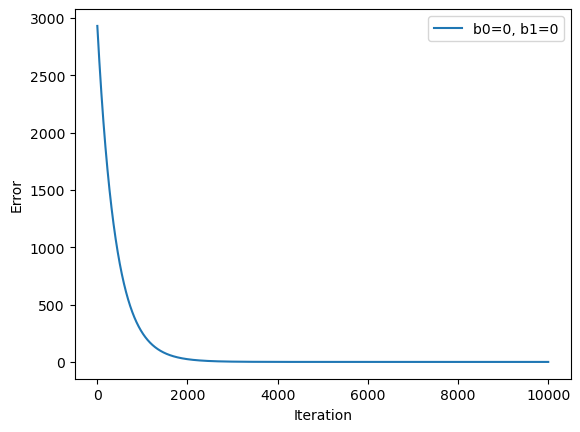

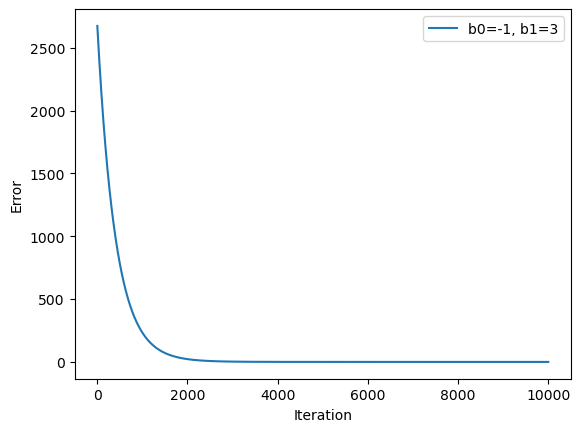

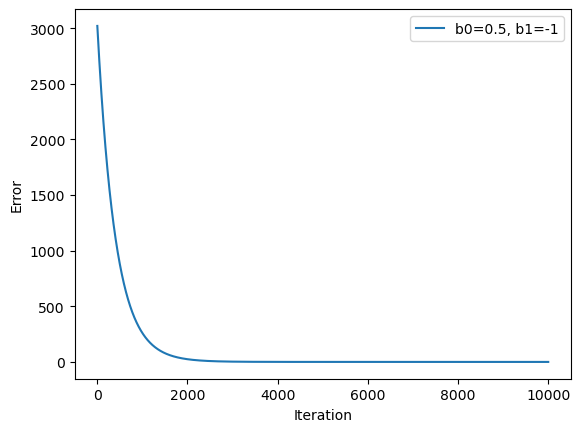

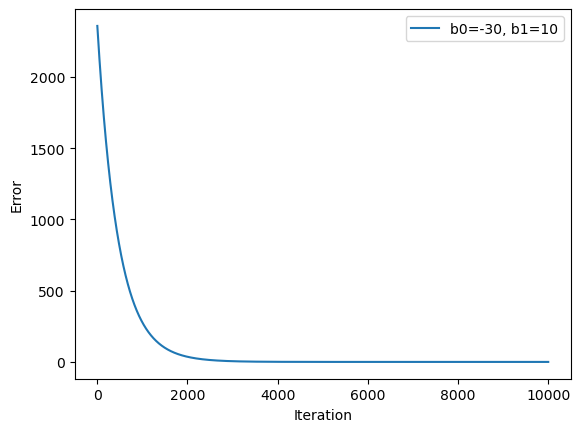

In [15]:
initial_parameters = [(0, 0), (-1, 3), (0.5, -1), (-30, 10)]

for initial_b0, initial_b1 in initial_parameters:
    steps, errors, final_error = init_parameters(initial_b0, initial_b1)
    print(f"Initial parameters (b0={initial_b0}, b1={initial_b1}), Final error: {final_error}")

    plt.figure()
    plt.plot(steps, errors, label=f"b0={initial_b0}, b1={initial_b1}")
    plt.xlabel("Iteration")
    plt.ylabel("Error")
    plt.legend()

plt.show()

 Как мы видим, в каждом из случаев модель сходится к оптимуму.
 
 Проверим различные значения скорости обучения и найдем значения, при котором градиентный спуск расходится.

In [24]:
def learn_rate(learning_rate):
    steps, errors = hyp.fit(x, y, alpha=learning_rate)
    final_error = errors[-1]
    return steps, errors, final_error

Learning rate: 0.001, Final error: 6.22451718642533e-14
Learning rate: 0.005, Final error: 8.222798585527682e-25
Learning rate: 0.007, Final error: 4.240946400397785e-25
Learning rate: 0.01, Final error: 2.006036254818294e-25
Learning rate: 0.05, Final error: 7.817813716347189e-27
Learning rate: 0.07, Final error: 2.763345238324601e-27
Learning rate: 0.1, Final error: 1.6583631164782415e-27


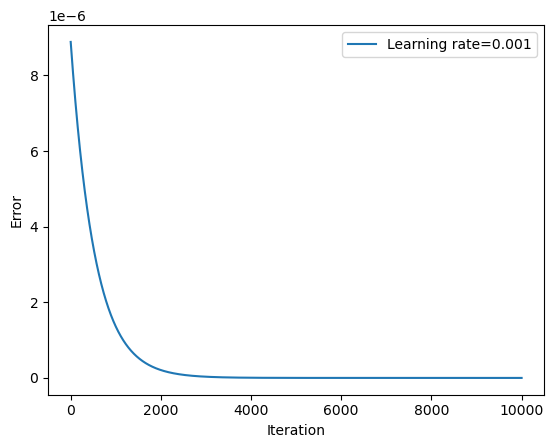

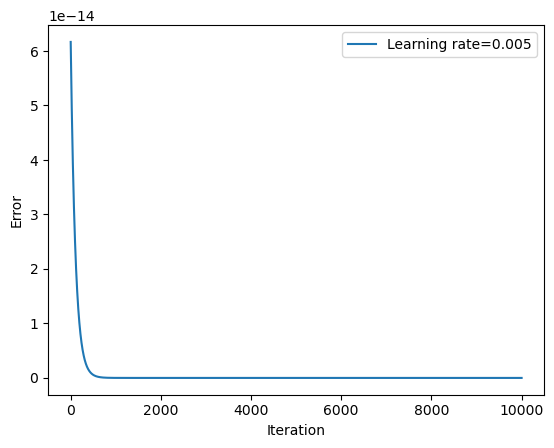

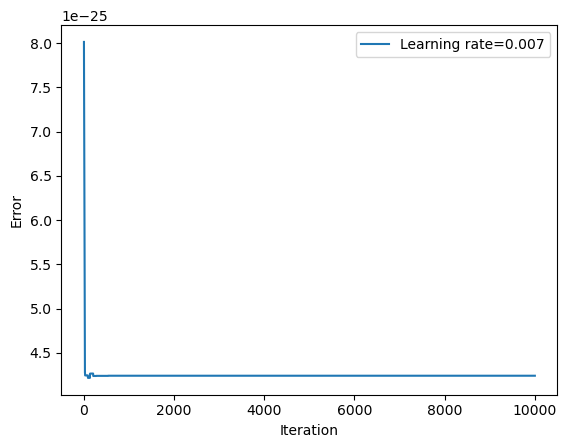

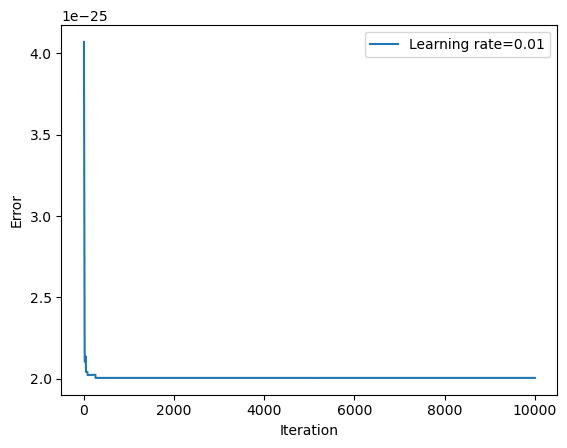

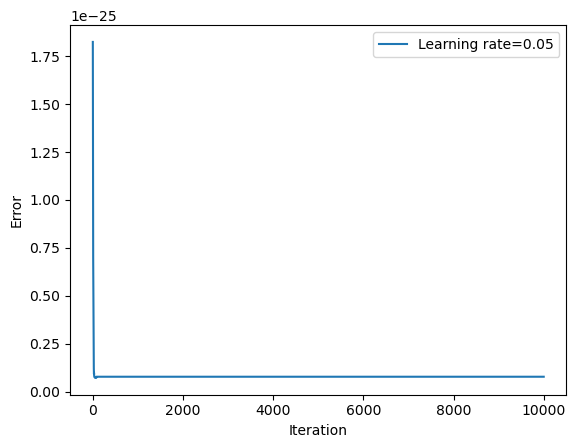

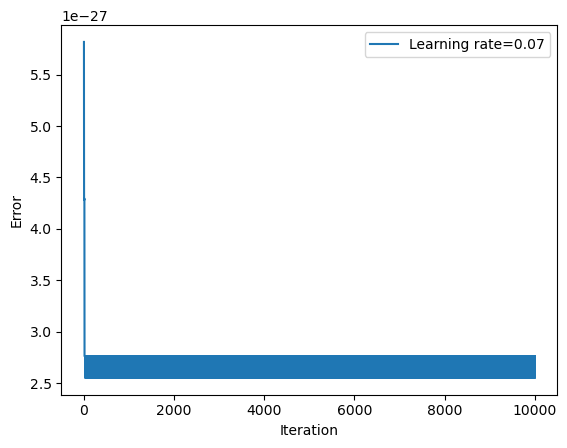

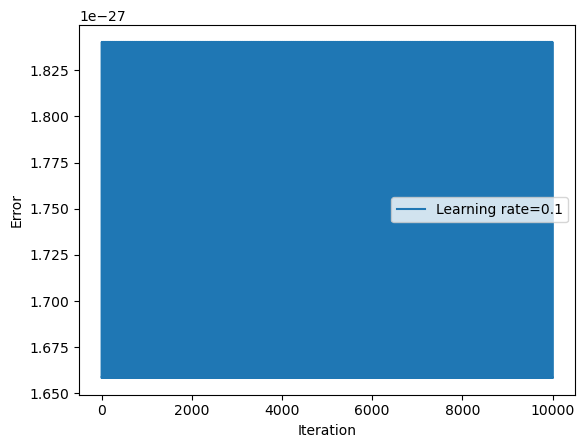

In [25]:
learning_rates = [0.001, 0.005, 0.007, 0.01, 0.05, 0.07, 0.1]

for learning_rate in learning_rates:
    steps, errors, final_error = learn_rate(learning_rate)
    print(f"Learning rate: {learning_rate}, Final error: {final_error}")

    plt.figure()
    plt.plot(steps, errors, label=f"Learning rate={learning_rate}")
    plt.xlabel("Iteration")
    plt.ylabel("Error")
    plt.legend()

plt.show()

Из графиков видно, что чем выше значение скорости обучения, тем выше значение ошибки. Исходя из графиков, для обучения модели лучше выбирать значение скорости обучения меньше 0.005.

Модифицируем код модели таким образом, чтобы он корректно работал как с _Series_, так и с _DataFrame_. 

In [30]:
class Model(object):
    def __init__(self):
        self.b0 = 0
        self.b1 = 0
    def predict(self, X):
        return self.b0 + self.b1 * X
    def error(self, X, Y):
        return sum(((self.predict(X) - Y)**2) / (2 * len(X)))
    def fit(self, X, Y, alpha=0.001, accuracy=0.01, max_steps=5000):
        if isinstance(X, pd.Series):
            X = X.values  # Конвертируем Series в NumPy array
        if isinstance(Y, pd.Series):
            Y = Y.values  # Конвертируем Series в NumPy array
        steps, errors = [], []
        step = 0        
        for _ in range(10000):
            dJ0 = sum(self.predict(X) - Y) /len(X)
            dJ1 = sum((self.predict(X) - Y) * X) /len(X)
            self.b0 -= alpha * dJ0
            self.b1 -= alpha * dJ1    
            new_err = hyp.error(X, Y)
            step += 1            
            steps.append(step)
            errors.append(new_err)
        return steps, errors

Error after gradient descent: 2.776975306057215e-06


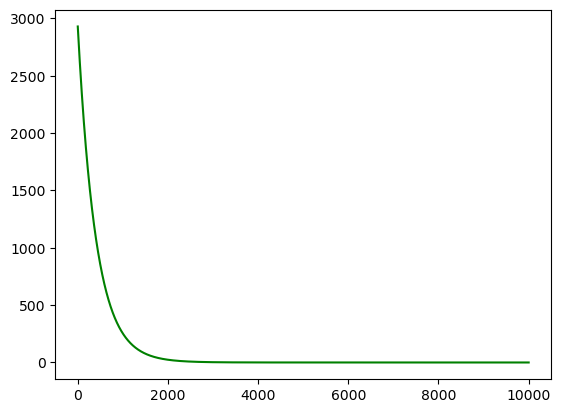

In [31]:
data = pd.read_csv('data/x.csv', index_col=0)
x = data['0']
y = pd.read_csv('data/y.csv', index_col=0)['0']

hyp = Model()
steps, errors = hyp.fit(x, y)
J = hyp.error(x, y)
print("Error after gradient descent:", J)

plt.figure()
plt.plot(steps, errors, 'g')
plt.show()

Модифицируем алгоритм градиентного спука таким образом, чтобы он останавливался, если ошибка перестает снижаться. Для этого будем сравнивать, на сколько понизилась ошибка на каждом шаге и если это снижение меньше некоторой заранее заданной очень маленькой величины - выходим из цикла. Эту величину можно взять одну миллионную, например. 

In [37]:
class Model(object):
    def __init__(self):
        self.b0 = 0
        self.b1 = 0
        
    def predict(self, X):
        return self.b0 + self.b1 * X
    
    def error(self, X, Y):
        return sum(((self.predict(X) - Y)**2) / (2 * len(X)))
    
    def fit(self, X, Y, alpha=0.001, accuracy=0.01, max_steps=5000):
        if isinstance(X, pd.Series):
            X = X.values  # Конвертируем Series в NumPy array
        if isinstance(Y, pd.Series):
            Y = Y.values  # Конвертируем Series в NumPy array
            
        steps, errors = [], []
        step = 0    
        prev_error = hyp.error(X, Y)
        
        for _ in range(10000):
            dJ0 = sum(self.predict(X) - Y) /len(X)
            dJ1 = sum((self.predict(X) - Y) * X) /len(X)
            self.b0 -= alpha * dJ0
            self.b1 -= alpha * dJ1    
            new_err = hyp.error(X, Y)
            step += 1            
            steps.append(step)
            errors.append(new_err)
            
            if abs(new_err - prev_error) < 1e-6:
                break
            prev_error = new_err
        
        return steps, errors

Error after gradient descent: 0.0005244076717215663


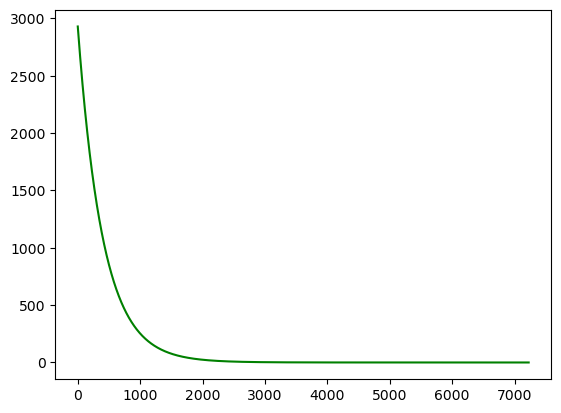

In [38]:
data = pd.read_csv('data/x.csv', index_col=0)
x = data['0']
y = pd.read_csv('data/y.csv', index_col=0)['0']

hyp = Model()
steps, errors = hyp.fit(x, y)
J = hyp.error(x, y)
print("Error after gradient descent:", J)

plt.figure()
plt.plot(steps, errors, 'g')
plt.show()

После изменения функции градиентного спуска ошибка изменилась и стала равна 0.0005244076717215663 вместо 2.776975306057215e-06.

Убедимся, что алгоритм градиентного спуска завершается всегда - либо если ошибка перестает существенно меняться, либо при достижении максимального количества шагов. 

In [41]:
class Model(object):
    def __init__(self):
        self.b0 = 0
        self.b1 = 0
        
    def predict(self, X):
        return self.b0 + self.b1 * X
    
    def error(self, X, Y):
        return sum(((self.predict(X) - Y)**2) / (2 * len(X)))
    
    def fit(self, X, Y, alpha=0.001, accuracy=0.01, max_steps=5000):
        if isinstance(X, pd.Series):
            X = X.values  # Конвертируем Series в NumPy array
        if isinstance(Y, pd.Series):
            Y = Y.values  # Конвертируем Series в NumPy array
            
        steps, errors = [], []
        step = 0    
        prev_error = hyp.error(X, Y)
        
        for _ in range(10000):
            dJ0 = sum(self.predict(X) - Y) /len(X)
            dJ1 = sum((self.predict(X) - Y) * X) /len(X)
            self.b0 -= alpha * dJ0
            self.b1 -= alpha * dJ1    
            new_err = hyp.error(X, Y)
            step += 1            
            steps.append(step)
            errors.append(new_err)
            
            '''if abs(new_err - prev_error) < 1e-6:
                break
            prev_error = new_err'''
            
        else:
            # Если достигли максимального количества шагов
            print("Максимальное количество шагов достигнуто")
        
        return steps, errors

Максимальное количество шагов достигнуто
Error after gradient descent: 2.776975306057215e-06


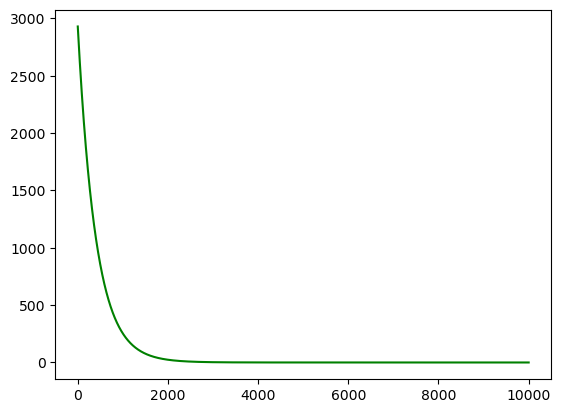

In [42]:
data = pd.read_csv('data/x.csv', index_col=0)
x = data['0']
y = pd.read_csv('data/y.csv', index_col=0)['0']

hyp = Model()
steps, errors = hyp.fit(x, y)
J = hyp.error(x, y)
print("Error after gradient descent:", J)

plt.figure()
plt.plot(steps, errors, 'g')
plt.show()

Реализуем механизм адаптивной скорости обучения. Зададим изначально скорость обучения, равную 1. Если ошибка после одного шага увеличивается - скорость обученияуменьшаем в 2 раза. Если не увеличивается - скорость обучения оставляем. 

In [54]:
class Model(object):
    def __init__(self):
        self.b0 = 0
        self.b1 = 0
        
    def predict(self, X):
        return self.b0 + self.b1 * X
    
    def error(self, X, Y):
        return sum(((self.predict(X) - Y)**2) / (2 * len(X)))
    
    def fit(self, X, Y, alpha=0.001, accuracy=0.01, max_steps=5000):
        if isinstance(X, pd.Series):
            X = X.values  # Конвертируем Series в NumPy array
        if isinstance(Y, pd.Series):
            Y = Y.values  # Конвертируем Series в NumPy array
            
        steps, errors = [], []
        step = 0    
        prev_error = hyp.error(X, Y)
        
        for _ in range(10000):
            dJ0 = sum(self.predict(X) - Y) /len(X)
            dJ1 = sum((self.predict(X) - Y) * X) /len(X)
            self.b0 -= alpha * dJ0
            self.b1 -= alpha * dJ1    
            new_err = hyp.error(X, Y)
            step += 1            
            steps.append(step)
            errors.append(new_err)
            
            if abs(new_err - prev_error) < 1e-6:
                break
            prev_error = new_err
    
            if new_err > prev_error:
                alpha /= 2.0 # Уменьшим скорость обучения вдвое
            
        else:
            # Если достигли максимального количества шагов
            print("Максимальное количество шагов достигнуто")
        
        return steps, errors

Error after gradient descent: 4.1772608368551725e-08


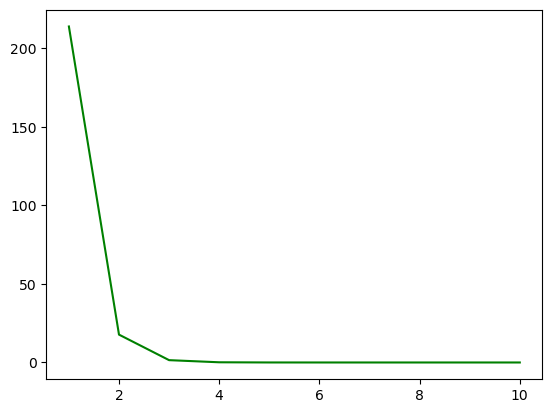

In [75]:
data = pd.read_csv('data/x.csv', index_col=0)
x = data['0']
y = pd.read_csv('data/y.csv', index_col=0)['0']

hyp = Model()
steps, errors = hyp.fit(x, y, alpha = 1.0)
J = hyp.error(x, y)
print("Error after gradient descent:", J)

plt.figure()
plt.plot(steps, errors, 'g')
plt.show()

In [76]:
class Model(object):
    def __init__(self):
        self.b0 = 0
        self.b1 = 0
        
    def predict(self, X):
        return self.b0 + self.b1 * X
    
    def error(self, X, Y):
        return sum(((self.predict(X) - Y)**2) / (2 * len(X)))
    
    def fit(self, X, Y, alpha=0.001, accuracy=0.01, max_steps=5000):
        if isinstance(X, pd.Series):
            X = X.values  # Конвертируем Series в NumPy array
        if isinstance(Y, pd.Series):
            Y = Y.values  # Конвертируем Series в NumPy array
            
        steps, errors = [], []
        step = 0    
        prev_error = hyp.error(X, Y)
        
        for _ in range(10000):
            dJ0 = sum(self.predict(X) - Y) /len(X)
            dJ1 = sum((self.predict(X) - Y) * X) /len(X)
            self.b0 -= alpha * dJ0
            self.b1 -= alpha * dJ1    
            new_err = hyp.error(X, Y)
            step += 1            
            steps.append(step)
            errors.append(new_err)
            
            if abs(new_err - prev_error) < 1e-6:
                break
            prev_error = new_err
    
            if new_err > prev_error:
                alpha /= 2.0 # Уменьшим скорость обучения вдвое
            
        else:
            # Если достигли максимального количества шагов
            print("Максимальное количество шагов достигнуто")
        
        return steps, errors
    
    def plot_regression(self, X, Y, xlabel="X", ylabel="Y"):
        if isinstance(X, pd.Series):
            X = X.values  # Конвертируем Series в NumPy array
        if isinstance(Y, pd.Series):
            Y = Y.values  # Конвертируем Series в NumPy array
            
        plt.figure()
        plt.scatter(X, Y)
        plt.xlabel(xlabel)
        plt.ylabel(ylabel)
        
        x_min, x_max = np.min(X), np.max(X)
        x_normalized = (X - x_min) / (x_max - x_min)
        y_normalized = self.predict(x_normalized)
        
        plt.plot(X, y_normalized, 'r')
        plt.show()

Error after gradient descent: 3.486936960398904e-09


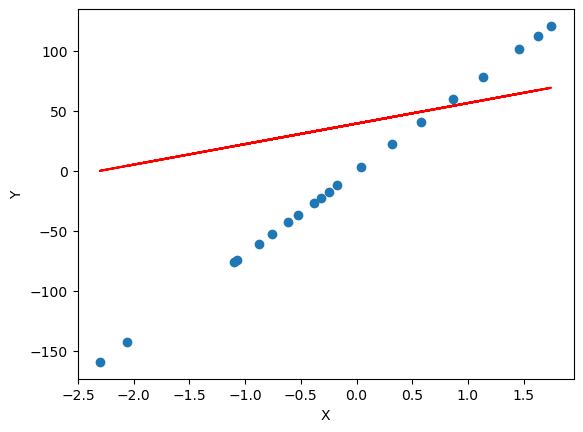

In [77]:
data = pd.read_csv('data/x.csv', index_col=0)
x = data['0']
y = pd.read_csv('data/y.csv', index_col=0)['0']

#hyp = Model()
steps, errors = hyp.fit(x, y, alpha=1.0)  
J = hyp.error(x, y)
print("Error after gradient descent:", J)

hyp.plot_regression(x, y)

### Дополнительные задания:

1. Изучите официальную документацию библиотеки [sklearn](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html). Постройте модель регрессии с использованием библиотечных средств на тех же данных. Постройте графики и сравните результаты.
3. Почитайте в документации про встроенный метод оценки качества регрессии score. Используйте его для оценки качетсва модели. Реализуйте такой же расчет в собственном классе модели.
1. (\*) Реализуйте нормирование входных значений. Это нужно делать внутри класса модели. Лучше всего - внутри метода обучения. Необходимо привести значения признаков к шкале [0; 1]. Подумайте, как теперь корректно считать теоретические значения.


Установим необходимые библиотеки и используем метод LinearRegression.

In [78]:
from sklearn.linear_model import LinearRegression

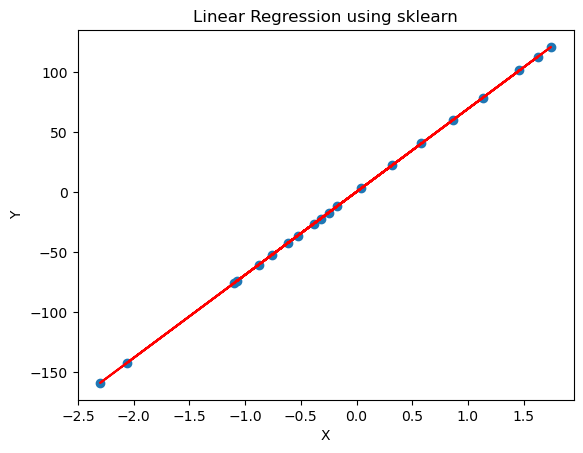

In [79]:
data = pd.read_csv('data/x.csv', index_col=0)
x = data['0'].values.reshape(-1, 1)
y = pd.read_csv('data/y.csv', index_col=0)['0'].values

model = LinearRegression()
model.fit(x, y)
y_pred = model.predict(x)

plt.scatter(x, y)
plt.plot(x, y_pred, color='red')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Linear Regression using sklearn')
plt.show()

Оценим качество модели с помощью score и построим график зависимости линейной регресии.

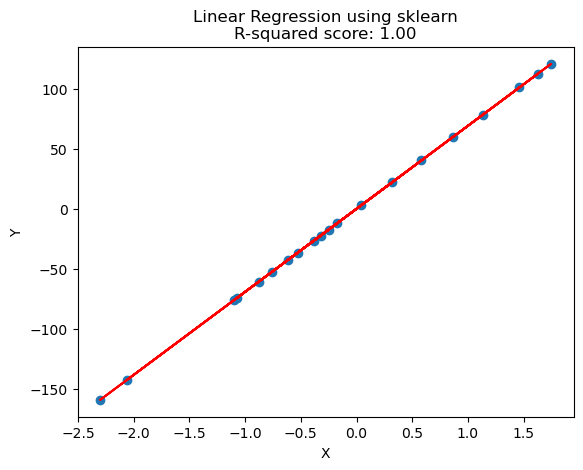

R-squared score: 1.00


In [80]:
score = model.score(x, y)

plt.scatter(x, y)
plt.plot(x, y_pred, color='red')
plt.xlabel('X')
plt.ylabel('Y')
plt.title(f'Linear Regression using sklearn\nR-squared score: {score:.2f}')
plt.show()

print(f'R-squared score: {score:.2f}')

Реализуем такой расчет в классе модели.

In [24]:
class Model(object):
    def __init__(self):
        self.b0 = 0
        self.b1 = 0
        
    def predict(self, X):
        return self.b0 + self.b1 * X
    
    def error(self, X, Y):
        return sum(((self.predict(X) - Y)**2) / (2 * len(X)))
    
    def fit(self, X, Y, alpha=0.001, accuracy=0.01, max_steps=5000):
        if isinstance(X, pd.Series):
            X = X.values  # Конвертируем Series в NumPy array
        if isinstance(Y, pd.Series):
            Y = Y.values  # Конвертируем Series в NumPy array
            
        steps, errors = [], []
        step = 0    
        prev_error = hyp.error(X, Y)
        
        for _ in range(10000):
            dJ0 = sum(self.predict(X) - Y) /len(X)
            dJ1 = sum((self.predict(X) - Y) * X) /len(X)
            self.b0 -= alpha * dJ0
            self.b1 -= alpha * dJ1    
            new_err = hyp.error(X, Y)
            step += 1            
            steps.append(step)
            errors.append(new_err)
            
            if abs(new_err - prev_error) < 1e-6:
                break
            prev_error = new_err
    
            if new_err > prev_error:
                alpha /= 2.0 # Уменьшим скорость обучения вдвое
        else:
            print("Максимальное количество шагов достигнуто")
        return steps, errors
    
    def plot_regression(self, X, Y, xlabel="X", ylabel="Y"):
        if isinstance(X, pd.Series):
            X = X.values  # Конвертируем Series в NumPy array
        if isinstance(Y, pd.Series):
            Y = Y.values  # Конвертируем Series в NumPy array
            
        plt.figure()
        plt.scatter(X, Y)
        plt.xlabel(xlabel)
        plt.ylabel(ylabel)
        
        x_min, x_max = np.min(X), np.max(X)
        x_normalized = (X - x_min) / (x_max - x_min)
        y_normalized = self.predict(x_normalized)
        
        plt.plot(X, y_normalized, 'r')
        plt.show()
    
    def score(self, X, Y):
        y_pred = self.predict(X)
        ssr = np.sum((y_pred - Y)**2)
        sst = np.sum((Y - np.mean(Y))**2)
        r_squared = 1 - (ssr / sst)
        return r_squared

Error after gradient descent: 0.0005244076717215663
R-squared score: 3.49


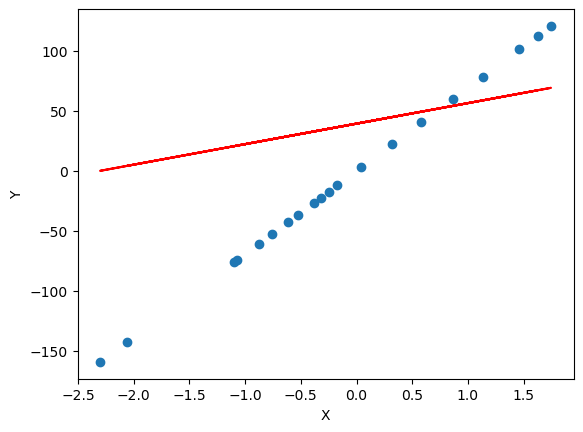

In [25]:
data = pd.read_csv('data/x.csv', index_col=0)
x = data['0']
y = pd.read_csv('data/y.csv', index_col=0)['0']

hyp = Model()
steps, errors = hyp.fit(x, y, alpha=0.001)
J = hyp.error(x, y)
print("Error after gradient descent:", J)

r_squared = hyp.score(x, y)
print(f'R-squared score: {r_squared:.2f}')

hyp.plot_regression(x, y)

Реализуем нормирование входных значений в классе модели.

In [86]:
class Model(object):
    def __init__(self):
        self.b0 = 0
        self.b1 = 0
        self.x_min = None
        self.x_max = None
        
    def predict(self, X):
        X_normalized = (X - self.x_min) / (self.x_max - self.x_min)
        return self.b0 + self.b1 * X_normalized
    
    def error(self, X, Y):
        return sum(((self.predict(X) - Y)**2) / (2 * len(X)))
    
    def fit(self, X, Y, alpha=0.001, accuracy=0.01, max_steps=5000):
        if isinstance(X, pd.Series):
            X = X.values  # Конвертируем Series в NumPy array
        if isinstance(Y, pd.Series):
            Y = Y.values  # Конвертируем Series в NumPy array
            
            
        self.x_min = X.min()
        self.x_max = X.max()
        X_normalized = (X - self.x_min) / (self.x_max - self.x_min)
        
        steps, errors = [], []
        step = 0    
        prev_error = hyp.error(X_normalized, Y)
        
        for _ in range(10000):
            dJ0 = sum(self.predict(X_normalized) - Y) /len(X_normalized)
            dJ1 = sum((self.predict(X_normalized) - Y) * X) /len(X_normalized)
            self.b0 -= alpha * dJ0
            self.b1 -= alpha * dJ1    
            new_err = hyp.error(X_normalized, Y)
            step += 1            
            steps.append(step)
            errors.append(new_err)
            
            if abs(new_err - prev_error) < 1e-6:
                break
            prev_error = new_err
    
            if new_err > prev_error:
                alpha /= 2.0 # Уменьшим скорость обучения вдвое
        else:
            print("Максимальное количество шагов достигнуто")
        return steps, errors
    
    def plot_regression(self, X, Y, xlabel="X", ylabel="Y"):
        if isinstance(X, pd.Series):
            X = X.values  # Конвертируем Series в NumPy array
        if isinstance(Y, pd.Series):
            Y = Y.values  # Конвертируем Series в NumPy array
            
        plt.figure()
        plt.scatter(X, Y)
        plt.xlabel(xlabel)
        plt.ylabel(ylabel)
        
        x_min, x_max = np.min(X), np.max(X)
        x_normalized = (X - x_min) / (x_max - x_min)
        y_normalized = self.predict(x_normalized)
        
        plt.plot(X, y_normalized, 'r')
        plt.show()
    
    def score(self, X, Y):
        X_normalized = (X - self.x_min) / (self.x_max - self.x_min)
        y_pred = self.predict(X_normalized)
        ssr = np.sum((y_pred - Y)**2)
        sst = np.sum((Y - np.mean(Y))**2)
        r_squared = 1 - (ssr / sst)
        return r_squared

Error after gradient descent: 44412.82155136297
R-squared score: 1.00


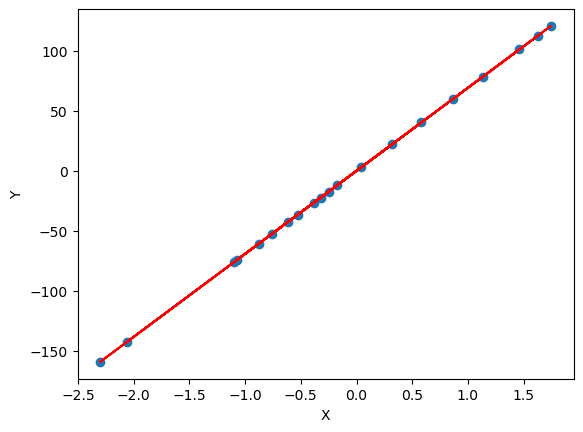

In [87]:
data = pd.read_csv('data/x.csv', index_col=0)
x = data['0']
y = pd.read_csv('data/y.csv', index_col=0)['0']

hyp = Model()
steps, errors = hyp.fit(x, y, alpha=1.0)
J = hyp.error(x, y)
print("Error after gradient descent:", J)

r_squared = hyp.score(x, y)
print(f'R-squared score: {r_squared:.2f}')

hyp.plot_regression(x, y)

#### Контрольные вопросы

1. **Сформулируйте, в чем состоит задача регрессии, придумайте несколько примеров.**

    Задача регрессии состоит в нахождении математической зависимости между входными переменными (факторами) и выходными переменными (целевыми значениями), где выходные переменные являются непрерывными. Это позволяет предсказывать или моделировать числовые значения на основе имеющихся данных. Примеры:
- Прогноз цен на недвижимость: Исходя из характеристик недвижимости, как размер, местоположение и возраст, регрессионная модель может предсказать стоимость недвижимости.
- Прогноз доходов: На основе образования, опыта и других факторов можно создать модель, которая предсказывает будущий доход человека.
- Погодные прогнозы: Регрессия может использоваться для предсказания температуры, осадков и других метеорологических параметров./n

2. **Что такое метод градиентного спуска?**

    Метод градиентного спуска - это численный метод оптимизации, который используется для нахождения минимума функции ошибки или потерь в машинном обучении. Он работает путем итеративного изменения параметров модели в направлении, обратном градиенту функции ошибки./n
    
2. **Что такое скорость обучения в методе градиентного спуска?**

    Скорость обучения в методе градиентного спуска - это параметр, который определяет шаг, с которым параметры модели обновляются на каждой итерации. Это важный гиперпараметр, который влияет на сходимость и стабильность алгоритма. Высокая скорость обучения может привести к расхождению, а слишком низкая - к медленной сходимости./n
    
3. **Какие функции ошибки используются в регрессионных моделях и почему именно такие?**

1) ***Среднеквадратическая ошибка (Mean Squared Error, MSE)***:
   - Формула: MSE = (1/n) * Σ(yi - ŷi)^2
   - Где n - количество наблюдений, yi - реальное значение, ŷi - предсказанное значение.
   - MSE измеряет среднее значение квадрата разницы между реальными и предсказанными значениями. Эта функция штрафует большие ошибки сильнее, что делает ее чувствительной к выбросам. Она часто используется, когда важно минимизировать средний квадрат ошибок.

2) ***Средняя абсолютная ошибка (Mean Absolute Error, MAE)***:
   - Формула: MAE = (1/n) * Σ|yi - ŷi|
   - MAE измеряет среднюю абсолютную разницу между реальными и предсказанными значениями. Эта функция менее чувствительна к выбросам, так как не использует квадрат разницы.

3) ***Коэффициент детерминации (R-squared, R^2)***:
   - Формула: R^2 = 1 - (SSR/SST)
   - Где SSR - сумма квадратов регрессии, SST - общая сумма квадратов.
   - R-squared измеряет долю объясненной дисперсии в данных. Значение R^2 находится в диапазоне от 0 до 1. Высокое R^2 (близкое к 1) указывает на хорошее соответствие модели данным, тогда как низкое R^2 (близкое к 0) означает, что модель плохо объясняет изменчивость данных.

    Выбор функции ошибки зависит от конкретной задачи и ее особенностей:
- Если данные содержат выбросы, то MAE может быть предпочтительнее, так как она менее чувствительна к экстремальным значениям.
- Если целью является минимизация среднего квадрата ошибок, то MSE может быть более подходящей функцией.
- R-squared полезен для оценки объясненной дисперсии в регрессионной модели и помогает понять, насколько модель хорошо соответствует данным./n

4. **Что показывает конкретное значение ошибки регрессии?**

    Конкретное значение ошибки регрессии представляет собой метрику, которая измеряет, насколько хорошо модель соответствует данным. Чем меньше значение ошибки, тем лучше модель. Это показывает, насколько близко предсказанные значения к реальным данным./n

5. **Что показывает график обучения и зачем его строить?**

    График обучения - это график, который показывает, как меняется ошибка модели на протяжении итераций градиентного спуска. График обучения полезен для визуальной оценки сходимости модели и скорости снижения ошибки. Если график показывает, что ошибка уменьшается и стабилизируется, это указывает на успешное обучение модели. Если ошибка перестает изменяться, это может означать, что модель сходится.